In [1]:
import pandas as pd

SMC = 'w/ resampling'
LPOE = 'w/ grammar constraint'
IS = 'w/ weight correction'
IS_slow = 'w/ semantic potential'

data = [
    # SMC
    [SMC, 'Goal inference', 0.419, 0.365, 0.476],
    [SMC, 'Molecular synthesis', 0.577, 0.557, 0.592],
    [SMC, 'Data science', 0.270, 0.250, 0.292],
    [SMC, 'Text-to-SQL', 0.620, 0.597, 0.644],

    [IS_slow, 'Goal inference', 0.257, 0.21, 0.31],
    [IS_slow, 'Molecular synthesis', 0.404, 0.37, 0.44],
    [IS_slow, 'Data science', 0.223, 0.19, 0.27],
    [IS_slow, 'Text-to-SQL', 0.618, 0.59, 0.64],

    [IS, 'Goal inference', 0.083, 0.059, 0.113],
    [IS, 'Molecular synthesis', 0.228, 0.205, 0.252],
    #[IS, 'DS1000', 0.116, 0.09, 0.15],
    [IS, 'Text-to-SQL', 0.597, 0.572, 0.620],
    
    [LPOE, 'Goal inference', 0.086, 0.066, 0.112],
    [LPOE, 'Molecular synthesis', 0.189, 0.170, 0.209],
    #[LPOE, 'DS1000', 0.076, 0.06, 0.10],
    [LPOE, 'Text-to-SQL', 0.559, 0.536, 0.581],
    
    ['LM', 'Goal inference', 0.063, 0.049, 0.082],
    ['LM', 'Molecular synthesis', 0.132, 0.117, 0.148],
    ['LM', 'Data science', 0.117, 0.093, 0.139],
    ['LM', 'Text-to-SQL', 0.531, 0.508, 0.553]
]

df = pd.DataFrame(data, columns=['Method', 'Domain', 'Score', 'Lower', 'Upper'])

In [2]:
from plotnine import (
        ggplot, aes, geom_bar, geom_errorbar, facet_wrap, theme_light, 
        labs, theme, element_text, guides, guide_legend, scale_fill_manual,
        element_blank, xlab
)
from pandas import CategoricalDtype

method_order = CategoricalDtype(categories=['LM', LPOE, IS, IS_slow, SMC], ordered=True)
df['Method features\n(cumulative)'] = df['Method'].astype(method_order)

df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Lower CI'] = pd.to_numeric(df['Lower'], errors='coerce')
df['Upper CI'] = pd.to_numeric(df['Upper'], errors='coerce')

colors = ["#FDE725", "#5CC863",  "#287D8E", "#3E4A89", "#440154"]

plot = (ggplot(df, aes(x='Method features\n(cumulative)', y='Score', fill='Method features\n(cumulative)'))
        + geom_bar(stat='identity', position='dodge', width=0.7)
        + geom_errorbar(aes(ymin='Lower', ymax='Upper'), width=0.2)
        + facet_wrap('~Domain', nrow=2, scales='free')
        + theme_light()
        + labs(title='', y='Accuracy on task', x='')
        + theme(axis_text_x=element_blank(), legend_position='bottom')
        + guides(fill=guide_legend(nrow=3))
        + scale_fill_manual(values=colors)
)

# Display the plot
plot.save("accuracy_by_methods_plot.png", width=7, height=6, dpi=300)

/home/lebrunb/miniconda3/envs/genparse/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7 x 6 in image.
/home/lebrunb/miniconda3/envs/genparse/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: accuracy_by_methods_plot.png


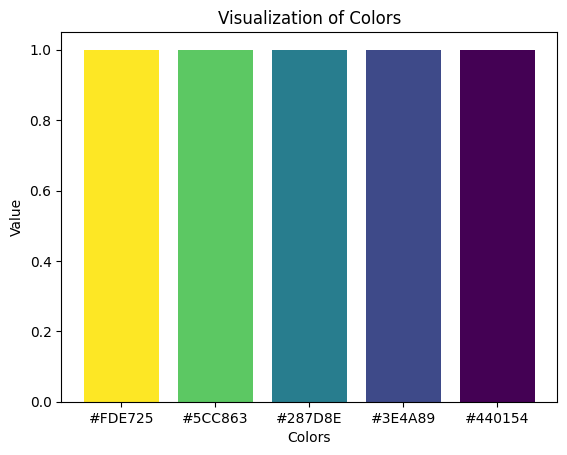

In [1]:
import matplotlib.pyplot as plt

colors = ["#FDE725", "#5CC863",  "#287D8E", "#3E4A89", "#440154"]
x = range(len(colors))

plt.bar(x, [1]*len(colors), color=colors)
plt.xticks(x, colors)
plt.xlabel('Colors')
plt.ylabel('Value')
plt.title('Visualization of Colors')
plt.show()